In [129]:
##Importing important libraries

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc('font', size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
from matplotlib.pyplot import figure
figure( figsize=(10, 8))
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import Counter

# ignore warning
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

<Figure size 720x576 with 0 Axes>

In [130]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [17]:

conda install -c conda-forge scikit-learn


Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [248]:
## Importing the two datasets 
survey = pd.read_csv(r'survey_data.csv')
survey1 = pd.read_csv(r'survey_data.csv')
sdoh = pd.read_csv(r'sdoh_data.csv')
print('survey', survey.shape)
print('sdoh' , sdoh.shape)

survey (2218, 22)
sdoh (33120, 29)


In [132]:
## Checking the null values on survey data 
survey.isnull().sum()

Q1.3_1        0
Q1.14         0
Q4.2         73
Q4.6        535
Q6.30         0
Q9.1          0
Q9.2_1        0
Q9.2_2        0
Q9.2_3        0
Q9.2_4        0
Q9.2_5        0
Q9.2_6        0
Q9.2_7        0
Q9.2_8        0
Q9.2_9        0
Q9.6_1        0
Q11.1_3      16
Q12.2        17
Q12.6        17
Q13.2        18
Q13.6        19
CS_COUNT      0
dtype: int64

In [133]:
## Checking percentage of null values
survey.isnull().sum() / survey.shape[0] * 100

Q1.3_1       0.000000
Q1.14        0.000000
Q4.2         3.291253
Q4.6        24.120830
Q6.30        0.000000
Q9.1         0.000000
Q9.2_1       0.000000
Q9.2_2       0.000000
Q9.2_3       0.000000
Q9.2_4       0.000000
Q9.2_5       0.000000
Q9.2_6       0.000000
Q9.2_7       0.000000
Q9.2_8       0.000000
Q9.2_9       0.000000
Q9.6_1       0.000000
Q11.1_3      0.721371
Q12.2        0.766456
Q12.6        0.766456
Q13.2        0.811542
Q13.6        0.856628
CS_COUNT     0.000000
dtype: float64

In [134]:
## Checking datatype
survey.dtypes

Q1.3_1       object
Q1.14        object
Q4.2         object
Q4.6        float64
Q6.30         int64
Q9.1          int64
Q9.2_1       object
Q9.2_2       object
Q9.2_3       object
Q9.2_4       object
Q9.2_5       object
Q9.2_6       object
Q9.2_7       object
Q9.2_8       object
Q9.2_9       object
Q9.6_1       object
Q11.1_3      object
Q12.2        object
Q12.6        object
Q13.2        object
Q13.6        object
CS_COUNT      int64
dtype: object

In [135]:
sdoh.dtypes

ZCTA                         int64
STATE                       object
ACS_PCT_CTZ_US_BORN        float64
ACS_PCT_FEMALE             float64
ACS_TOTAL_POP_WT             int64
ACS_MEDIAN_AGE             float64
ACS_PCT_AGE_80UP           float64
ACS_PCT_AIAN               float64
ACS_PCT_ASIAN              float64
ACS_PCT_BLACK              float64
ACS_PCT_HISPAN             float64
ACS_PCT_MULT_RACE          float64
ACS_PCT_NHPI               float64
ACS_PCT_WHITE              float64
ACS_PCT_DISABLE            float64
ACS_PCT_NONVA_POOR         float64
ACS_MEDIAN_HH_INCOME       float64
ACS_PCT_FOOD_STAMP         float64
ACS_PCT_HH_PUB_ASSIST      float64
ACS_PER_CAPITA_INCOME      float64
ACS_PCT_BACHELOR_DGR       float64
ACS_MEDIAN_HOME_VALUE      float64
CCBP_RATE_CFS_PER_1000     float64
CCBP_RATE_SOGS_PER_1000    float64
ACS_PCT_MEDICAID_ANY64     float64
ACS_PCT_PRIVATE_ANY64      float64
ACS_PCT_PRIVATE_EMPL64     float64
ACS_PCT_MEDICARE_ONLY      float64
ACS_PCT_UNINSURED   

In [136]:
## Checking null values from the sdoh dataset
sdoh.isnull().sum()

ZCTA                           0
STATE                          0
ACS_PCT_CTZ_US_BORN          450
ACS_PCT_FEMALE               321
ACS_TOTAL_POP_WT               0
ACS_MEDIAN_AGE               564
ACS_PCT_AGE_80UP             321
ACS_PCT_AIAN                 321
ACS_PCT_ASIAN                321
ACS_PCT_BLACK                321
ACS_PCT_HISPAN               321
ACS_PCT_MULT_RACE            321
ACS_PCT_NHPI                 321
ACS_PCT_WHITE                321
ACS_PCT_DISABLE              414
ACS_PCT_NONVA_POOR           718
ACS_MEDIAN_HH_INCOME        2229
ACS_PCT_FOOD_STAMP           612
ACS_PCT_HH_PUB_ASSIST        612
ACS_PER_CAPITA_INCOME        664
ACS_PCT_BACHELOR_DGR         357
ACS_MEDIAN_HOME_VALUE       2472
CCBP_RATE_CFS_PER_1000     32987
CCBP_RATE_SOGS_PER_1000    26100
ACS_PCT_MEDICAID_ANY64       547
ACS_PCT_PRIVATE_ANY64        547
ACS_PCT_PRIVATE_EMPL64       547
ACS_PCT_MEDICARE_ONLY        414
ACS_PCT_UNINSURED            414
dtype: int64

In [137]:
## checking percentage of null values on the sdoh dataset
sdoh.isnull().sum() / sdoh.shape[0] * 100

ZCTA                        0.000000
STATE                       0.000000
ACS_PCT_CTZ_US_BORN         1.358696
ACS_PCT_FEMALE              0.969203
ACS_TOTAL_POP_WT            0.000000
ACS_MEDIAN_AGE              1.702899
ACS_PCT_AGE_80UP            0.969203
ACS_PCT_AIAN                0.969203
ACS_PCT_ASIAN               0.969203
ACS_PCT_BLACK               0.969203
ACS_PCT_HISPAN              0.969203
ACS_PCT_MULT_RACE           0.969203
ACS_PCT_NHPI                0.969203
ACS_PCT_WHITE               0.969203
ACS_PCT_DISABLE             1.250000
ACS_PCT_NONVA_POOR          2.167874
ACS_MEDIAN_HH_INCOME        6.730072
ACS_PCT_FOOD_STAMP          1.847826
ACS_PCT_HH_PUB_ASSIST       1.847826
ACS_PER_CAPITA_INCOME       2.004831
ACS_PCT_BACHELOR_DGR        1.077899
ACS_MEDIAN_HOME_VALUE       7.463768
CCBP_RATE_CFS_PER_1000     99.598430
CCBP_RATE_SOGS_PER_1000    78.804348
ACS_PCT_MEDICAID_ANY64      1.651570
ACS_PCT_PRIVATE_ANY64       1.651570
ACS_PCT_PRIVATE_EMPL64      1.651570
A

In [249]:
## Renaming the variables
survey.rename(columns = {'Q1.3_1' : 'ZCTA' , 'Q1.14' :'tenure', 'Q4.2' : 'visit' , 'Q4.6' : 'doctor_rate' , 'Q6.30' : 'health_plan_rate' 
                         , 'Q9.1' :'recommend' , 'Q9.2_1':'cost', 'Q9.2_2':'coverage' , 'Q9.2_3':'network' , 
                         'Q9.2_4':'service' , 'Q9.2_5':'drug_coverage' , 'Q9.2_6':'plan_support' , 
                         'Q9.2_7':'do_it_yourself' , 'Q9.2_8':'member_exp' , 'Q9.2_9':'plan_brand' , 
                         'Q9.6_1':'retention' , 'Q11.1_3':'health_rate' , 'Q12.2' : 'education' , 
                         'Q12.6' : 'language' , 'Q13.2' : 'income' , 'Q13.6' : 'payment'}, inplace = True)

In [139]:
survey.groupby('tenure').size()

tenure
1 year (joined in 2019)                        199
2 years (joined in 2018)                       294
3 years (joined in 2017)                       287
4 years (joined in 2016)                       181
5 years (joined in 2015)                       226
6 years (joined in 2014)                       111
7 or more years (joined in 2013 or earlier)    602
Less than 1 year (joined in 2020)              177
Less than 3 months (joined in 2021)            141
dtype: int64

In [140]:
## tenure
tenure = {'Less than 3 months (joined in 2021)':1, 
            'Less than 1 year (joined in 2020)':2, 
            '1 year (joined in 2019)':3, 
            '2 years (joined in 2018)':4, 
            '3 years (joined in 2017)':5,
            '4 years (joined in 2016)':6,
            '5 years (joined in 2015)':7,
            '6 years (joined in 2014)':8,
            '7 or more years (joined in 2013 or earlier)':9}
# apply using map
survey['tenure'] = survey.tenure.map(tenure)

In [141]:
survey.groupby('tenure').size()

tenure
1    141
2    177
3    199
4    294
5    287
6    181
7    226
8    111
9    602
dtype: int64

In [142]:
# create dictionary of ordinal to integer mapping
## Cost
cost = {'Far short of expectations':1, 
            'Slightly short of expectations':2, 
            'Equals expectations':3, 
            'Slightly exceeds expectations':4, 
            'Far exceeds expectations':5}
# apply using map
survey['cost'] = survey.cost.map(cost)

In [143]:
survey.groupby('cost').size()

cost
1      44
2     115
3    1055
4     380
5     624
dtype: int64

In [144]:
survey.groupby('education').size()

education
4-year college graduate                   648
8th grade or less                           1
High school graduate or GED               287
More than 4-year college degree           607
Some college or 2-year degree             650
Some high school, but did not graduate      8
dtype: int64

In [145]:
## Coverage
coverage = {'Far short of expectations':1, 
            'Slightly short of expectations':2, 
            'Equals expectations':3, 
            'Slightly exceeds expectations':4, 
            'Far exceeds expectations':5}
# apply using map
survey['coverage'] = survey.coverage.map(coverage)

In [146]:
## Network
network = {'Far short of expectations':1, 
            'Slightly short of expectations':2, 
            'Equals expectations':3, 
            'Slightly exceeds expectations':4, 
            'Far exceeds expectations':5}
# apply using map
survey['network'] = survey.network.map(network)

In [147]:
## service
service = {'Far short of expectations':1, 
            'Slightly short of expectations':2, 
            'Equals expectations':3, 
            'Slightly exceeds expectations':4, 
            'Far exceeds expectations':5}
# apply using map
survey['service'] = survey.service.map(service)

In [148]:
## drug_coverage
drug_coverage = {'Far short of expectations':1, 
            'Slightly short of expectations':2, 
            'Equals expectations':3, 
            'Slightly exceeds expectations':4, 
            'Far exceeds expectations':5}
# apply using map
survey['drug_coverage'] = survey.drug_coverage.map(drug_coverage)

In [149]:
## plan_support
plan_support = {'Far short of expectations':1, 
            'Slightly short of expectations':2, 
            'Equals expectations':3, 
            'Slightly exceeds expectations':4, 
            'Far exceeds expectations':5}
# apply using map
survey['plan_support'] = survey.plan_support.map(plan_support)


In [150]:
## do_it_yourself
do_it_yourself = {'Far short of expectations':1, 
            'Slightly short of expectations':2, 
            'Equals expectations':3, 
            'Slightly exceeds expectations':4, 
            'Far exceeds expectations':5}
# apply using map
survey['do_it_yourself'] = survey.do_it_yourself.map(do_it_yourself)


In [151]:
## member_exp
member_exp = {'Far short of expectations':1, 
            'Slightly short of expectations':2, 
            'Equals expectations':3, 
            'Slightly exceeds expectations':4, 
            'Far exceeds expectations':5}
# apply using map
survey['member_exp'] = survey.member_exp.map(member_exp)

In [152]:
## plan_brand
plan_brand = {'Far short of expectations':1, 
            'Slightly short of expectations':2, 
            'Equals expectations':3, 
            'Slightly exceeds expectations':4, 
            'Far exceeds expectations':5}
# apply using map
survey['plan_brand'] = survey.plan_brand.map(plan_brand)

In [153]:
## retantion
retention = {'Somewhat agree':1, 
            'Strongly agree':1, 
            'Neither agree nor disagree':0, 
            'Somewhat disagree':0, 
            'Strongly disagree':0}
# apply using map
survey['retention'] = survey.retention.map(retention)

In [154]:
## health_rate
health_rate = {'Poor':1, 
            'Fair':2, 
            'Good':3, 
            'Very good':4, 
            'Excellent':5}
# apply using map
survey['health_rate'] = survey.health_rate.map(health_rate)

In [155]:
survey.groupby('education').size()

education
4-year college graduate                   648
8th grade or less                           1
High school graduate or GED               287
More than 4-year college degree           607
Some college or 2-year degree             650
Some high school, but did not graduate      8
dtype: int64

In [156]:
## educatoin
education = {'8th grade or less':1, 
            'Some high school, but did not graduate':2, 
            'High school graduate or GED':3, 
            'Some college or 2-year degree':4, 
            '4-year college graduate':5,
            'More than 4-year college degree' :6}
# apply using map
survey['education'] = survey.education.map(education)

In [157]:
## language
language = {'English':1, 
            'Chinese':0, 
            'French or French Creole':0, 
            'Other (Please specify)':0, 
            'Spanisht':0}
# apply using map
survey['language'] = survey.language.map(language)

In [158]:
## Income
income = {'Prefer not to answer':0, 
            'Less than $7,500':1, 
            '$7,501 to $12,500':2, 
            '$12,501 to $17,000':3,
            '$17,001 to $20,000':4,
            '$20,001 to $25,000':5,
            '$25,001 to $30,000':6,
            '$30,001 to $50,000':7,
            '$50,001 to $75,000':8,
            '$75,001 to $100,000':9,
            '$100,001 to $150,000':10,
            '$150,001 to $200,000':11,
            '$200,001 or above':12}
# apply using map
survey['income'] = survey.income.map(income)

In [159]:
survey.groupby('health_rate').size()

health_rate
1.0     18
2.0    213
3.0    810
4.0    883
5.0    278
dtype: int64

In [160]:
survey.groupby('retention').size()

retention
0     359
1    1859
dtype: int64

In [161]:
survey.groupby('language').size()

language
0.0      25
1.0    2169
dtype: int64

In [162]:
survey.groupby('income').size()

income
0.0     153
1.0       5
2.0      18
3.0      38
4.0      46
5.0      86
6.0      97
7.0     409
8.0     490
9.0     348
10.0    339
11.0    110
12.0     61
dtype: int64

In [163]:
survey.groupby('education').size()

education
1.0      1
2.0      8
3.0    287
4.0    650
5.0    648
6.0    607
dtype: int64

In [164]:
survey.groupby('doctor_rate').size()

doctor_rate
2.0       3
3.0       6
4.0       7
5.0      27
6.0      39
7.0     111
8.0     280
9.0     470
10.0    740
dtype: int64

In [165]:
survey.groupby('visit').size()

visit
1 time              1026
10 or more times       2
2 times              483
3 times              112
4 times               37
5 to 9 times          23
None                 462
dtype: int64

In [166]:
survey.head()

,ZCTA,tenure,visit,doctor_rate,health_plan_rate,recommend,cost,coverage,network,service,...,do_it_yourself,member_exp,plan_brand,retention,health_rate,education,language,income,payment,CS_COUNT
0,80122,4,1 time,7.0,8,8,3,3,3,4,...,3,3,3,1,3.0,6.0,1.0,10.0,Social Security income,1
1,53074,5,2 times,6.0,8,8,3,4,4,2,...,3,4,4,1,4.0,5.0,1.0,10.0,Other savings,0
2,3269,1,1 time,8.0,8,8,5,3,4,3,...,3,3,4,1,4.0,5.0,1.0,8.0,Social Security income,2
3,16066,4,1 time,8.0,9,8,3,3,3,3,...,3,3,3,1,3.0,5.0,1.0,9.0,Social Security income,0
4,1701,9,1 time,8.0,8,0,2,3,3,3,...,3,3,3,0,3.0,5.0,1.0,10.0,Social Security income,4


In [167]:
from sklearn.preprocessing import OneHotEncoder

In [168]:
# Drop rows which contain any NaN value in the selected columns
survey = survey.dropna(subset=['health_rate', 'education' , 'language' , 'income' , 'payment'])

In [169]:
survey.isnull().sum() / survey.shape[0] * 100

ZCTA                 0.000000
tenure               0.000000
visit                3.239051
doctor_rate         23.996350
health_plan_rate     0.000000
recommend            0.000000
cost                 0.000000
coverage             0.000000
network              0.000000
service              0.000000
drug_coverage        0.000000
plan_support         0.000000
do_it_yourself       0.000000
member_exp           0.000000
plan_brand           0.000000
retention            0.000000
health_rate          0.000000
education            0.000000
language             0.000000
income               0.000000
payment              0.000000
CS_COUNT             0.000000
dtype: float64

In [170]:
## payment
payment = {'Social Security income':1, 
            'Health Savings Account (HSA) savings':0, 
            'Other (please specify)':0, 
            'Other income':0, 
            'Other savings':0,
            'Someone else pays it for me':0}
# apply using map
survey['payment'] = survey.payment.map(payment)

In [171]:
## visit
visit = {'None':0, 
            '1 time':1, 
            '2 times':2, 
            '3 times':3, 
            '4 times':4,
            '5 to 9 times':5,
            '10 or more times':6}
# apply using map
survey['visit'] = survey.visit.map(visit)

In [172]:
survey.groupby('visit').size()

visit
0.0     455
1.0    1016
2.0     479
3.0     111
4.0      36
5.0      22
6.0       2
dtype: int64

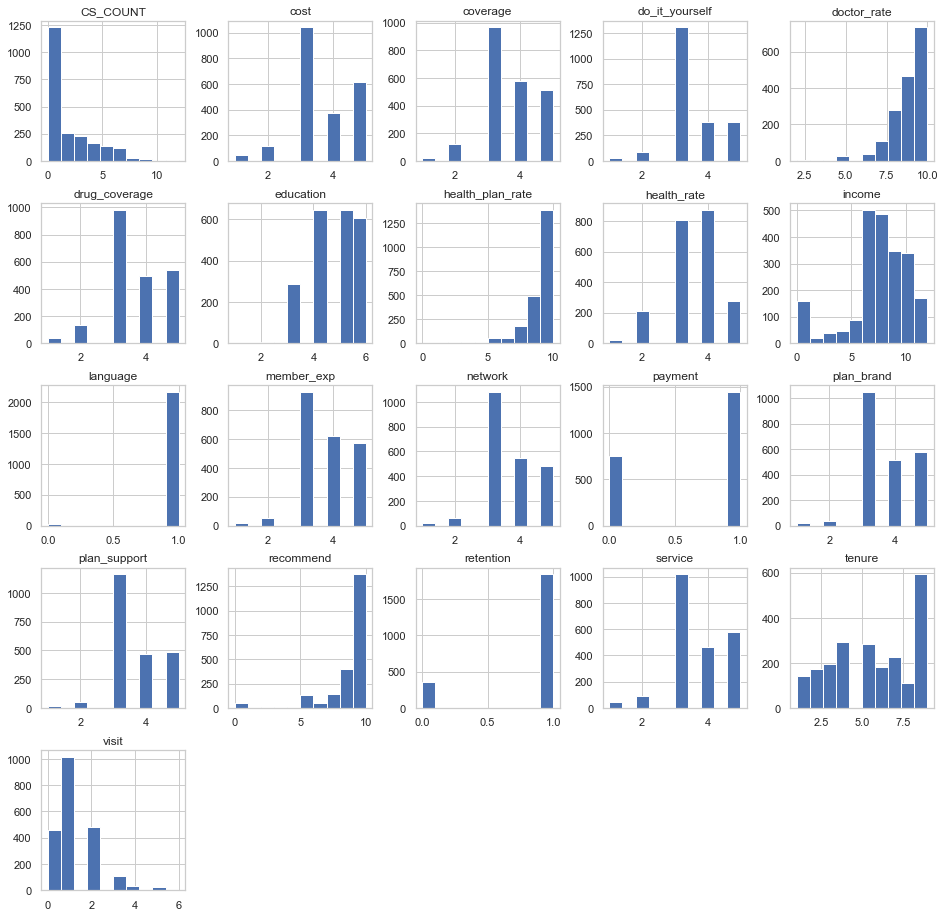

In [173]:

survey.hist(figsize=(16,16))
plt.show()

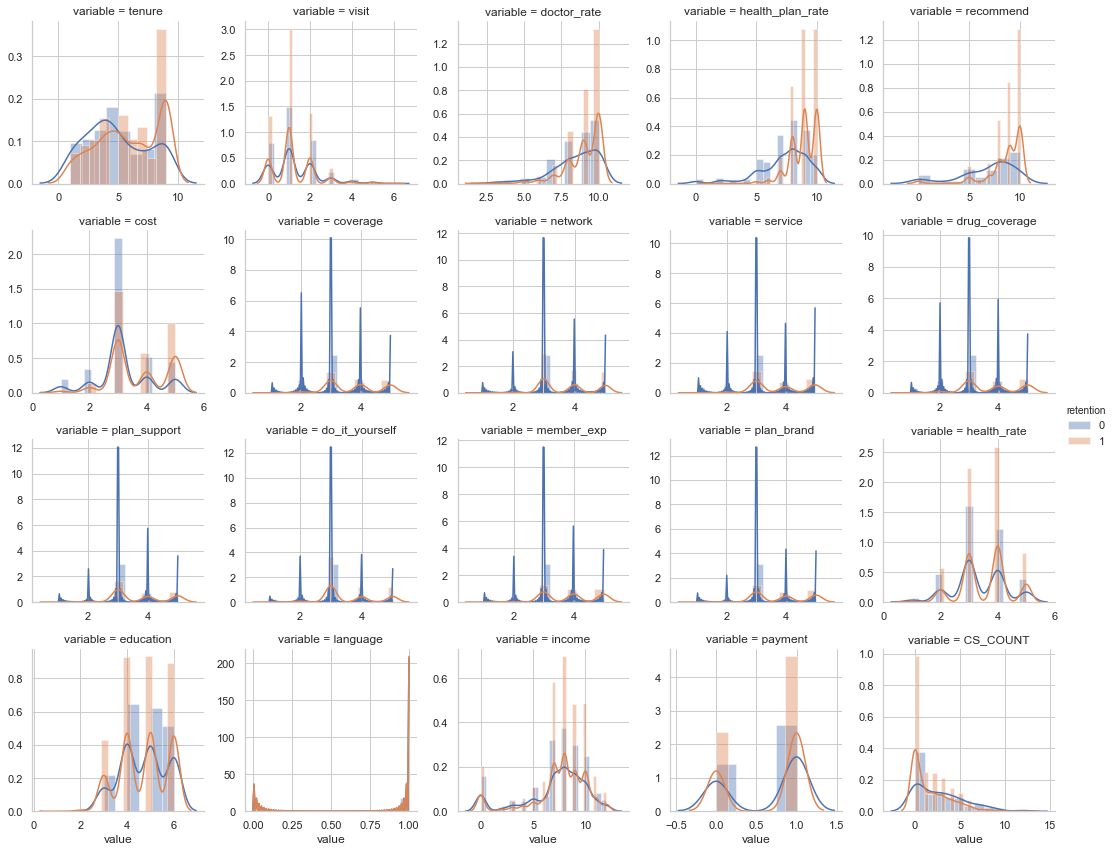

In [174]:
cols = [ f for f in survey.columns if survey.dtypes[ f ] != "object"]
cols.remove( 'retention' )
f = pd.melt( survey, id_vars='retention', value_vars=cols)
g = sns.FacetGrid( f, hue='retention', col='variable', col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, 'value', kde=True).add_legend()

In [54]:
conda install -c conda-forge msno

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - msno

Current channels:

  - https://conda.anaconda.org/conda-forge/osx-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [175]:
survey.isnull()

,ZCTA,tenure,visit,doctor_rate,health_plan_rate,recommend,cost,coverage,network,service,...,do_it_yourself,member_exp,plan_brand,retention,health_rate,education,language,income,payment,CS_COUNT
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2216,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [176]:
survey.notnull()

,ZCTA,tenure,visit,doctor_rate,health_plan_rate,recommend,cost,coverage,network,service,...,do_it_yourself,member_exp,plan_brand,retention,health_rate,education,language,income,payment,CS_COUNT
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2214,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2215,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2216,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [177]:
import missingno as msno

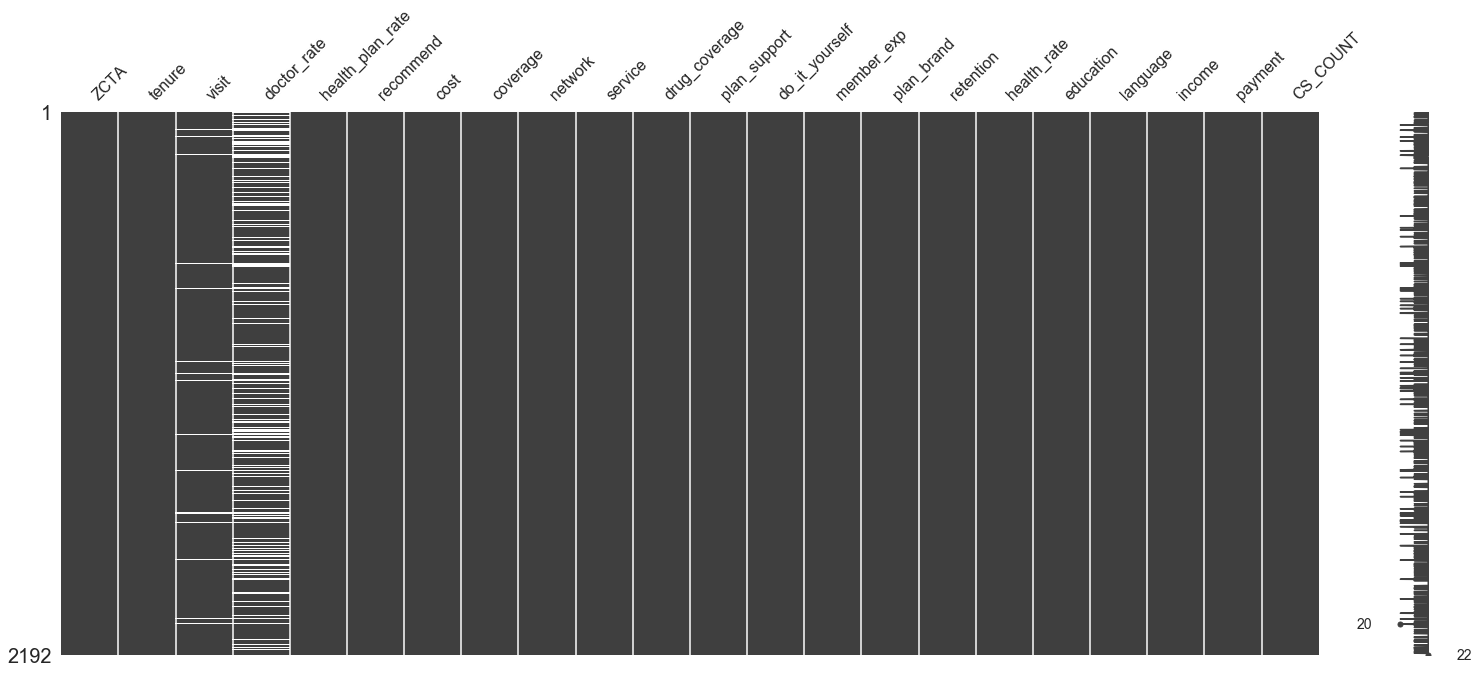

In [178]:
msno.matrix(survey)

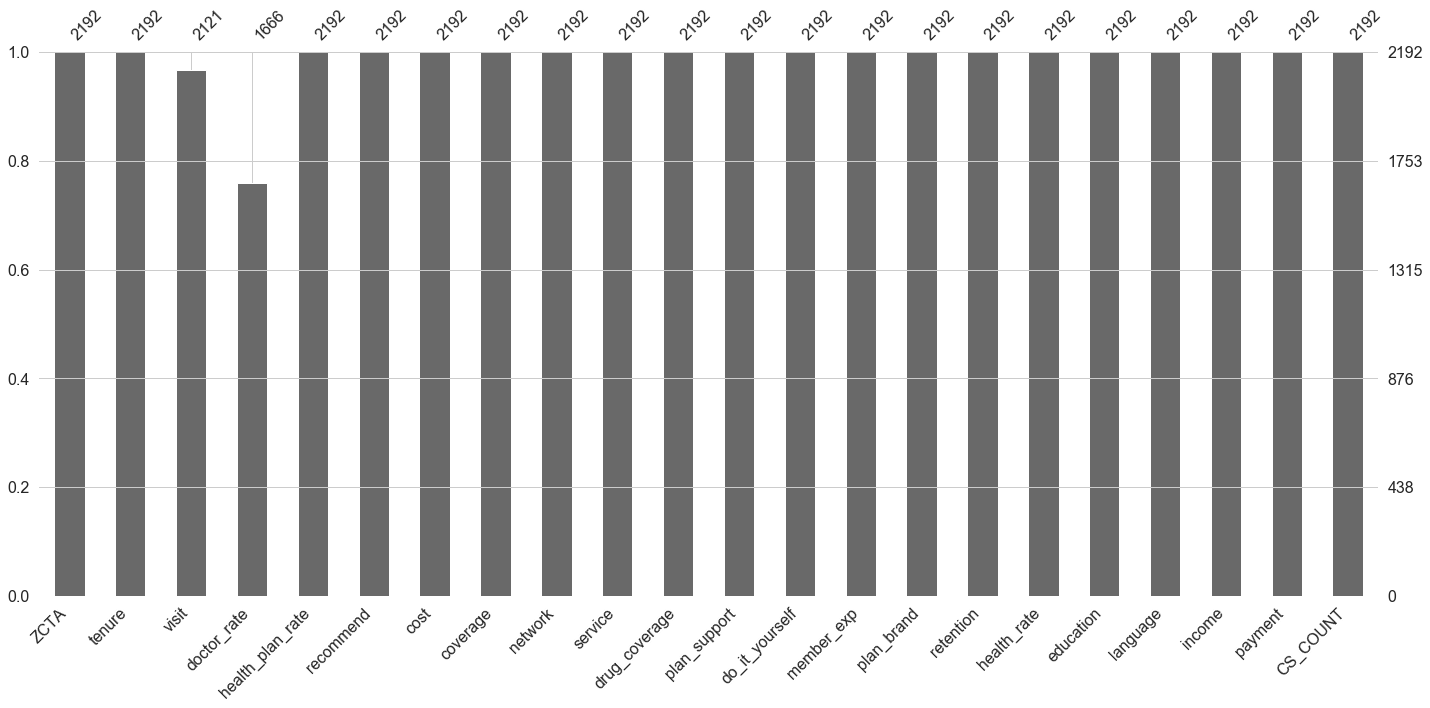

In [179]:
msno.bar(survey)

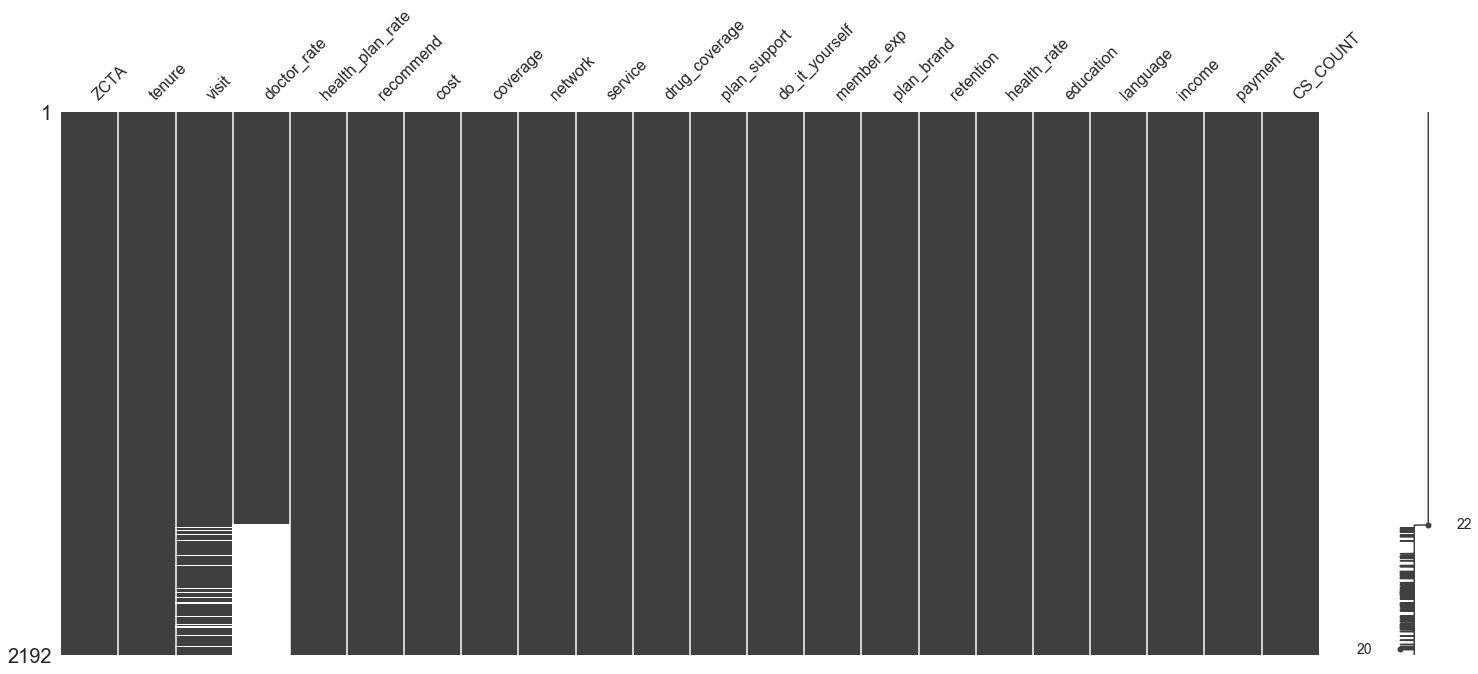

In [180]:
sorted = survey.sort_values('doctor_rate')
msno.matrix(sorted)


In [181]:
survey['doctor_rate'].isna().sum()

526

In [182]:
survey1.groupby('Q4.6').size()

Q4.6
2.0       3
3.0       6
4.0       7
5.0      27
6.0      39
7.0     111
8.0     280
9.0     470
10.0    740
dtype: int64

In [183]:
survey.groupby('doctor_rate').size()

doctor_rate
2.0       3
3.0       6
4.0       7
5.0      27
6.0      39
7.0     108
8.0     277
9.0     465
10.0    734
dtype: int64

In [184]:
survey['doctor_rate'] = survey['doctor_rate'].fillna(survey['doctor_rate'].mode()[0]) # mode

In [185]:
survey['visit'] = survey['visit'].fillna(survey['visit'].mode()[0]) # mode

In [186]:
survey.isnull().sum()

ZCTA                0
tenure              0
visit               0
doctor_rate         0
health_plan_rate    0
recommend           0
cost                0
coverage            0
network             0
service             0
drug_coverage       0
plan_support        0
do_it_yourself      0
member_exp          0
plan_brand          0
retention           0
health_rate         0
education           0
language            0
income              0
payment             0
CS_COUNT            0
dtype: int64

In [187]:
survey['ZCTA'] = survey['ZCTA'].replace([' 48430-3525'],'48430')

In [188]:
survey['ZCTA'] = survey['ZCTA'].astype(int)

In [189]:
df = survey.merge(sdoh, how='left', left_on='ZCTA', right_on='ZCTA')

In [190]:
print(df)

       ZCTA  tenure  visit  doctor_rate  health_plan_rate  recommend  cost  \
0     80122       4    1.0          7.0                 8          8     3   
1     53074       5    2.0          6.0                 8          8     3   
2      3269       1    1.0          8.0                 8          8     5   
3     16066       4    1.0          8.0                 9          8     3   
4      1701       9    1.0          8.0                 8          0     2   
...     ...     ...    ...          ...               ...        ...   ...   
2187  18640       5    1.0          3.0                 7          6     3   
2188  19116       9    1.0         10.0                 9         10     3   
2189  98006       4    1.0         10.0                10         10     5   
2190  98208       6    1.0         10.0                10          9     3   
2191  15010       9    1.0          5.0                 9          8     3   

      coverage  network  service  ...  ACS_PER_CAPITA_INCOME  \

In [191]:
df1=df

In [192]:
df.isnull().sum()

ZCTA                          0
tenure                        0
visit                         0
doctor_rate                   0
health_plan_rate              0
recommend                     0
cost                          0
coverage                      0
network                       0
service                       0
drug_coverage                 0
plan_support                  0
do_it_yourself                0
member_exp                    0
plan_brand                    0
retention                     0
health_rate                   0
education                     0
language                      0
income                        0
payment                       0
CS_COUNT                      0
STATE                        11
ACS_PCT_CTZ_US_BORN          11
ACS_PCT_FEMALE               11
ACS_TOTAL_POP_WT             11
ACS_MEDIAN_AGE               11
ACS_PCT_AGE_80UP             11
ACS_PCT_AIAN                 11
ACS_PCT_ASIAN                11
ACS_PCT_BLACK                11
ACS_PCT_

In [193]:
df.isnull().sum() / df.shape[0] * 100

ZCTA                        0.000000
tenure                      0.000000
visit                       0.000000
doctor_rate                 0.000000
health_plan_rate            0.000000
recommend                   0.000000
cost                        0.000000
coverage                    0.000000
network                     0.000000
service                     0.000000
drug_coverage               0.000000
plan_support                0.000000
do_it_yourself              0.000000
member_exp                  0.000000
plan_brand                  0.000000
retention                   0.000000
health_rate                 0.000000
education                   0.000000
language                    0.000000
income                      0.000000
payment                     0.000000
CS_COUNT                    0.000000
STATE                       0.501825
ACS_PCT_CTZ_US_BORN         0.501825
ACS_PCT_FEMALE              0.501825
ACS_TOTAL_POP_WT            0.501825
ACS_MEDIAN_AGE              0.501825
A

In [194]:
df = df.dropna(subset=['ACS_PCT_ASIAN' , 'language'])

In [195]:
df.isnull().sum() / df.shape[0] * 100

ZCTA                        0.000000
tenure                      0.000000
visit                       0.000000
doctor_rate                 0.000000
health_plan_rate            0.000000
recommend                   0.000000
cost                        0.000000
coverage                    0.000000
network                     0.000000
service                     0.000000
drug_coverage               0.000000
plan_support                0.000000
do_it_yourself              0.000000
member_exp                  0.000000
plan_brand                  0.000000
retention                   0.000000
health_rate                 0.000000
education                   0.000000
language                    0.000000
income                      0.000000
payment                     0.000000
CS_COUNT                    0.000000
STATE                       0.000000
ACS_PCT_CTZ_US_BORN         0.000000
ACS_PCT_FEMALE              0.000000
ACS_TOTAL_POP_WT            0.000000
ACS_MEDIAN_AGE              0.000000
A

In [252]:
df1

,ZCTA,tenure,visit,doctor_rate,health_plan_rate,recommend,cost,coverage,network,service,...,ACS_PCT_FOOD_STAMP,ACS_PCT_HH_PUB_ASSIST,ACS_PER_CAPITA_INCOME,ACS_PCT_BACHELOR_DGR,ACS_MEDIAN_HOME_VALUE,ACS_PCT_MEDICAID_ANY64,ACS_PCT_PRIVATE_ANY64,ACS_PCT_PRIVATE_EMPL64,ACS_PCT_MEDICARE_ONLY,ACS_PCT_UNINSURED
0,80122,4,1.0,7.0,8,8,3,3,3,4,...,1.850,0.548,46772.0,36.469,392200.0,6.993,85.507,73.856,6.681,3.642
1,53074,5,2.0,6.0,8,8,3,4,4,2,...,6.333,1.804,34194.0,23.747,197100.0,10.335,81.103,69.089,5.223,4.035
2,3269,1,1.0,8.0,8,8,5,3,4,3,...,5.122,2.170,38770.0,20.017,265600.0,8.210,78.571,69.417,7.628,3.730
3,16066,4,1.0,8.0,9,8,3,3,3,3,...,2.535,1.056,49900.0,36.597,292700.0,6.145,87.293,77.326,2.856,2.432
4,1701,9,1.0,8.0,8,0,2,3,3,3,...,4.447,1.039,53652.0,33.434,408800.0,11.078,82.047,71.929,3.205,2.921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,18640,5,1.0,3.0,7,6,3,3,3,3,...,21.171,4.124,27505.0,11.465,120800.0,23.105,67.338,58.328,4.568,3.059
2188,19116,9,1.0,10.0,9,10,3,3,3,3,...,20.475,4.248,28115.0,18.435,238900.0,17.152,66.268,51.255,5.284,9.375
2189,98006,4,1.0,10.0,10,10,5,5,5,5,...,3.257,1.073,64946.0,36.139,812200.0,6.448,86.177,72.625,4.408,4.628
2190,98208,6,1.0,10.0,10,9,3,4,4,4,...,12.762,3.528,36345.0,23.475,359900.0,14.050,75.086,65.454,3.172,5.381


In [196]:
df = df.dropna(subset=['ACS_PCT_FOOD_STAMP' , 'ACS_MEDIAN_HH_INCOME' , 'ACS_MEDIAN_HOME_VALUE'])

In [197]:
sdoh.isnull().sum()

ZCTA                           0
STATE                          0
ACS_PCT_CTZ_US_BORN          450
ACS_PCT_FEMALE               321
ACS_TOTAL_POP_WT               0
ACS_MEDIAN_AGE               564
ACS_PCT_AGE_80UP             321
ACS_PCT_AIAN                 321
ACS_PCT_ASIAN                321
ACS_PCT_BLACK                321
ACS_PCT_HISPAN               321
ACS_PCT_MULT_RACE            321
ACS_PCT_NHPI                 321
ACS_PCT_WHITE                321
ACS_PCT_DISABLE              414
ACS_PCT_NONVA_POOR           718
ACS_MEDIAN_HH_INCOME        2229
ACS_PCT_FOOD_STAMP           612
ACS_PCT_HH_PUB_ASSIST        612
ACS_PER_CAPITA_INCOME        664
ACS_PCT_BACHELOR_DGR         357
ACS_MEDIAN_HOME_VALUE       2472
CCBP_RATE_CFS_PER_1000     32987
CCBP_RATE_SOGS_PER_1000    26100
ACS_PCT_MEDICAID_ANY64       547
ACS_PCT_PRIVATE_ANY64        547
ACS_PCT_PRIVATE_EMPL64       547
ACS_PCT_MEDICARE_ONLY        414
ACS_PCT_UNINSURED            414
dtype: int64

In [198]:
sdoh = sdoh.dropna(subset=['ACS_PCT_ASIAN' , 'ACS_MEDIAN_HH_INCOME' , 'ACS_MEDIAN_HOME_VALUE'])

In [199]:
sdoh = sdoh.dropna()

In [200]:
HH_median_income = sdoh.groupby(by="STATE")["ACS_MEDIAN_HOME_VALUE"].mean()

print("Average Median HH Income by State", HH_median_income)

Average Median HH Income by State STATE
Alaska                  292366.666667
Arizona                 225900.000000
Arkansas                 78550.000000
California              541507.142857
Colorado                391000.000000
Connecticut             265600.000000
District of Columbia    659700.000000
Florida                 158850.000000
Georgia                 157375.000000
Hawaii                  514200.000000
Idaho                   183300.000000
Illinois                 36700.000000
Indiana                 119500.000000
Iowa                    125700.000000
Kansas                  126000.000000
Kentucky                119500.000000
Maryland                141700.000000
Massachusetts           677100.000000
Michigan                120500.000000
Minnesota               196880.000000
Missouri                181200.000000
New Hampshire           228100.000000
New Jersey              326866.666667
New Mexico              130000.000000
New York                371275.000000
North Caro

In [201]:
Bachelor = sdoh.groupby(by="STATE")["ACS_PCT_BACHELOR_DGR"].mean()

print("Average Percentage Population with Bachelor's Degee  by State", Bachelor)

Average Percentage Population with Bachelor's Degee  by State STATE
Alaska                  21.057000
Arizona                 19.953500
Arkansas                 5.919500
California              19.675214
Colorado                37.513500
Connecticut             15.207000
District of Columbia    31.432000
Florida                 13.162000
Georgia                 17.005250
Hawaii                  15.987000
Idaho                   16.802000
Illinois                 3.710000
Indiana                 10.691000
Iowa                    16.345500
Kansas                  15.445000
Kentucky                 8.686000
Maryland                14.021500
Massachusetts           24.979500
Michigan                14.801500
Minnesota               24.181600
Missouri                30.250000
New Hampshire           15.282000
New Jersey              19.086333
New Mexico              13.007000
New York                15.885167
North Carolina          18.095500
Ohio                    19.712000
Oklahoma      

In [202]:
df.dtypes

ZCTA                         int64
tenure                       int64
visit                      float64
doctor_rate                float64
health_plan_rate             int64
recommend                    int64
cost                         int64
coverage                     int64
network                      int64
service                      int64
drug_coverage                int64
plan_support                 int64
do_it_yourself               int64
member_exp                   int64
plan_brand                   int64
retention                    int64
health_rate                float64
education                  float64
language                   float64
income                     float64
payment                      int64
CS_COUNT                     int64
STATE                       object
ACS_PCT_CTZ_US_BORN        float64
ACS_PCT_FEMALE             float64
ACS_TOTAL_POP_WT           float64
ACS_MEDIAN_AGE             float64
ACS_PCT_AGE_80UP           float64
ACS_PCT_AIAN        

In [203]:
df.duplicated().sum()

0

In [245]:
df.isnull().sum() / df.shape[0] * 100

ZCTA                     0.0
tenure                   0.0
health_plan_rate         0.0
recommend                0.0
coverage                 0.0
network                  0.0
service                  0.0
drug_coverage            0.0
member_exp               0.0
plan_brand               0.0
CS_COUNT                 0.0
ACS_TOTAL_POP_WT         0.0
ACS_MEDIAN_HH_INCOME     0.0
ACS_PER_CAPITA_INCOME    0.0
ACS_MEDIAN_HOME_VALUE    0.0
dtype: float64

In [205]:
df.drop(["CCBP_RATE_CFS_PER_1000", "CCBP_RATE_SOGS_PER_1000", "STATE" , "language"], axis = 1, inplace=True)

In [206]:
print(df)

       ZCTA  tenure  visit  doctor_rate  health_plan_rate  recommend  cost  \
0     80122       4    1.0          7.0                 8          8     3   
1     53074       5    2.0          6.0                 8          8     3   
2      3269       1    1.0          8.0                 8          8     5   
3     16066       4    1.0          8.0                 9          8     3   
4      1701       9    1.0          8.0                 8          0     2   
...     ...     ...    ...          ...               ...        ...   ...   
2187  18640       5    1.0          3.0                 7          6     3   
2188  19116       9    1.0         10.0                 9         10     3   
2189  98006       4    1.0         10.0                10         10     5   
2190  98208       6    1.0         10.0                10          9     3   
2191  15010       9    1.0          5.0                 9          8     3   

      coverage  network  service  ...  ACS_PCT_FOOD_STAMP  \
0 

In [207]:
df.describe()

,ZCTA,tenure,visit,doctor_rate,health_plan_rate,recommend,cost,coverage,network,service,...,ACS_PCT_FOOD_STAMP,ACS_PCT_HH_PUB_ASSIST,ACS_PER_CAPITA_INCOME,ACS_PCT_BACHELOR_DGR,ACS_MEDIAN_HOME_VALUE,ACS_PCT_MEDICAID_ANY64,ACS_PCT_PRIVATE_ANY64,ACS_PCT_PRIVATE_EMPL64,ACS_PCT_MEDICARE_ONLY,ACS_PCT_UNINSURED
count,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000,...,2177.000000,2177.000000,2177.000000,2177.000000,2.177000e+03,2177.000000,2177.000000,2177.000000,2177.000000,2177.000000
mean,52435.989435,5.714286,1.205788,9.206706,8.659164,8.421222,3.639871,3.660083,3.650436,3.654571,...,10.153156,2.194738,37548.205328,22.378975,2.916330e+05,14.729708,71.147698,60.096368,5.618083,6.815139
std,32637.441133,2.643169,0.957221,1.209449,1.420876,2.085571,1.007248,0.921671,0.877356,0.979157,...,7.179987,1.741357,14153.822672,8.359479,2.172411e+05,9.087554,13.487586,12.592011,3.132631,4.611118
min,1001.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,12654.000000,2.910000,4.430000e+04,0.000000,17.005000,15.156000,0.000000,0.000000
25%,19116.000000,4.000000,1.000000,9.000000,8.000000,8.000000,3.000000,3.000000,3.000000,3.000000,...,4.929000,1.059000,28599.000000,16.192000,1.608000e+05,7.847000,63.099000,51.768000,3.828000,3.724000
50%,48067.000000,6.000000,1.000000,10.000000,9.000000,9.000000,3.000000,3.000000,3.000000,3.000000,...,8.555000,1.746000,34343.000000,21.595000,2.338000e+05,12.907000,72.840000,61.365000,4.895000,5.672000
75%,85747.000000,9.000000,2.000000,10.000000,10.000000,10.000000,5.000000,4.000000,4.000000,5.000000,...,13.498000,2.781000,43396.000000,28.160000,3.521000e+05,19.463000,81.545000,69.617000,6.402000,8.627000
max,99362.000000,9.000000,6.000000,10.000000,10.000000,10.000000,5.000000,5.000000,5.000000,5.000000,...,55.926000,15.001000,129810.000000,48.451000,2.000001e+06,56.621000,96.464000,86.719000,39.484000,53.259000


In [208]:
df1=df 

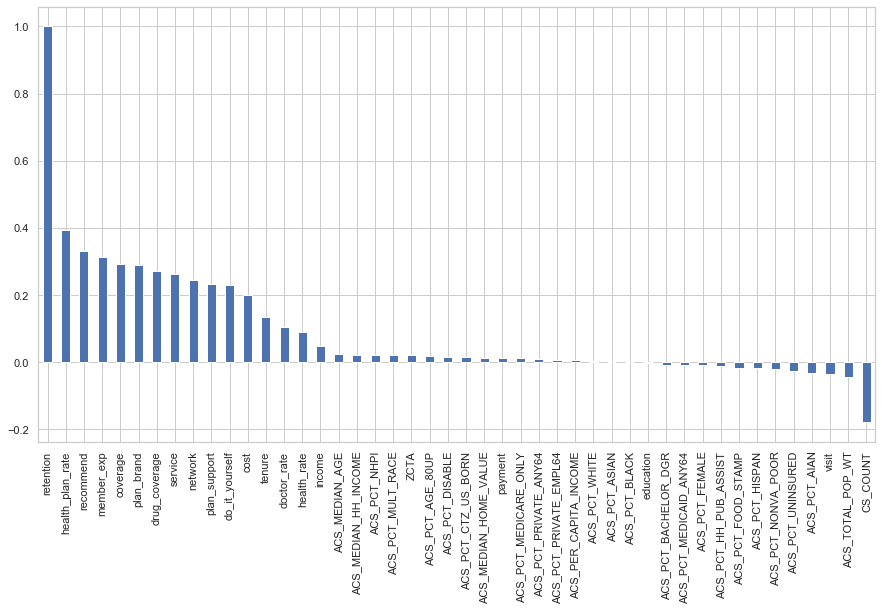

In [209]:
#Get Correlation of "Retention" with other variables:
plt.figure(figsize=(15,8))
df.corr()['retention'].sort_values(ascending = False).plot(kind='bar')

In [210]:
df.corr()

,ZCTA,tenure,visit,doctor_rate,health_plan_rate,recommend,cost,coverage,network,service,...,ACS_PCT_FOOD_STAMP,ACS_PCT_HH_PUB_ASSIST,ACS_PER_CAPITA_INCOME,ACS_PCT_BACHELOR_DGR,ACS_MEDIAN_HOME_VALUE,ACS_PCT_MEDICAID_ANY64,ACS_PCT_PRIVATE_ANY64,ACS_PCT_PRIVATE_EMPL64,ACS_PCT_MEDICARE_ONLY,ACS_PCT_UNINSURED
ZCTA,1.000000,0.026005,-0.020097,0.011829,-0.022421,0.006308,0.046825,0.026740,0.017927,-0.006258,...,-0.038977,0.069593,0.048634,0.107808,0.287189,0.053014,-0.084066,-0.126077,-0.042196,0.087515
tenure,0.026005,1.000000,0.004904,0.027971,0.126281,0.087535,-0.023821,0.065378,0.050647,0.065193,...,-0.002704,0.000513,0.014539,0.010944,0.032675,0.011278,0.002981,0.008234,0.003562,-0.024575
visit,-0.020097,0.004904,1.000000,-0.217374,0.011723,0.024468,0.025900,0.027234,0.047391,0.023904,...,0.096536,0.019581,-0.099829,-0.102082,-0.097872,0.063591,-0.098340,-0.103214,0.061580,0.094113
doctor_rate,0.011829,0.027971,-0.217374,1.000000,0.300416,0.210513,0.107535,0.150050,0.137421,0.176740,...,-0.019073,0.039567,0.026425,0.047437,0.057752,-0.023913,0.052771,0.067757,-0.114927,-0.049630
health_plan_rate,-0.022421,0.126281,0.011723,0.300416,1.000000,0.631267,0.309156,0.462086,0.432283,0.488769,...,-0.021602,0.008025,-0.005861,-0.000718,0.005264,-0.038585,0.049778,0.053087,-0.014412,-0.058201
recommend,0.006308,0.087535,0.024468,0.210513,0.631267,1.000000,0.284010,0.401581,0.363809,0.412673,...,-0.046629,-0.042942,0.007746,-0.000022,0.012278,-0.047315,0.053082,0.056462,-0.002146,-0.053948
cost,0.046825,-0.023821,0.025900,0.107535,0.309156,0.284010,1.000000,0.607153,0.537682,0.501462,...,-0.026640,-0.018093,-0.046775,-0.013774,-0.024690,-0.010787,-0.007459,-0.003061,0.034606,0.030771
coverage,0.026740,0.065378,0.027234,0.150050,0.462086,0.401581,0.607153,1.000000,0.766842,0.690709,...,-0.007102,0.000179,-0.026329,-0.019216,0.008346,-0.002991,-0.004160,-0.001285,0.014032,0.000380
network,0.017927,0.050647,0.047391,0.137421,0.432283,0.363809,0.537682,0.766842,1.000000,0.725461,...,-0.014123,-0.006429,-0.010872,0.000153,0.004743,-0.022431,0.019253,0.024051,-0.008231,-0.015446
service,-0.006258,0.065193,0.023904,0.176740,0.488769,0.412673,0.501462,0.690709,0.725461,1.000000,...,0.010932,0.026165,-0.033454,-0.037958,-0.002108,0.003088,0.002327,0.020175,-0.018718,-0.009410


In [211]:
df.head()

,ZCTA,tenure,visit,doctor_rate,health_plan_rate,recommend,cost,coverage,network,service,...,ACS_PCT_FOOD_STAMP,ACS_PCT_HH_PUB_ASSIST,ACS_PER_CAPITA_INCOME,ACS_PCT_BACHELOR_DGR,ACS_MEDIAN_HOME_VALUE,ACS_PCT_MEDICAID_ANY64,ACS_PCT_PRIVATE_ANY64,ACS_PCT_PRIVATE_EMPL64,ACS_PCT_MEDICARE_ONLY,ACS_PCT_UNINSURED
0,80122,4,1.0,7.0,8,8,3,3,3,4,...,1.850,0.548,46772.0,36.469,392200.0,6.993,85.507,73.856,6.681,3.642
1,53074,5,2.0,6.0,8,8,3,4,4,2,...,6.333,1.804,34194.0,23.747,197100.0,10.335,81.103,69.089,5.223,4.035
2,3269,1,1.0,8.0,8,8,5,3,4,3,...,5.122,2.170,38770.0,20.017,265600.0,8.210,78.571,69.417,7.628,3.730
3,16066,4,1.0,8.0,9,8,3,3,3,3,...,2.535,1.056,49900.0,36.597,292700.0,6.145,87.293,77.326,2.856,2.432
4,1701,9,1.0,8.0,8,0,2,3,3,3,...,4.447,1.039,53652.0,33.434,408800.0,11.078,82.047,71.929,3.205,2.921


In [212]:
survey.describe()

,ZCTA,tenure,visit,doctor_rate,health_plan_rate,recommend,cost,coverage,network,service,...,do_it_yourself,member_exp,plan_brand,retention,health_rate,education,language,income,payment,CS_COUNT
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,...,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,52455.982208,5.717153,1.206204,9.205292,8.657391,8.415602,3.640511,3.657391,3.648266,3.654653,...,3.455292,3.764142,3.724453,0.838504,3.540146,4.708029,0.988595,7.543796,0.657847,1.824818
std,32621.130932,2.644167,0.957994,1.208070,1.421890,2.089987,1.008119,0.922783,0.877170,0.979379,...,0.872946,0.897550,0.902244,0.368072,0.862121,1.023043,0.106208,2.796767,0.474539,2.234407
min,1001.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19119.000000,4.000000,1.000000,9.000000,8.000000,8.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,1.000000,3.000000,4.000000,1.000000,7.000000,0.000000,0.000000
50%,48071.500000,6.000000,1.000000,10.000000,9.000000,9.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,1.000000,4.000000,5.000000,1.000000,8.000000,1.000000,1.000000
75%,85739.750000,9.000000,2.000000,10.000000,10.000000,10.000000,5.000000,4.000000,4.000000,5.000000,...,4.000000,5.000000,5.000000,1.000000,4.000000,6.000000,1.000000,9.000000,1.000000,3.000000
max,99362.000000,9.000000,6.000000,10.000000,10.000000,10.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,1.000000,5.000000,6.000000,1.000000,12.000000,1.000000,12.000000


In [213]:
final_df=df

### I am using ensemble methods, No need to perform feature scaling for ensemble techniques, its prediction based on the creating multiple decision trees

### Feature Selection:
### Selects only 15 feature which has higher correlation

In [214]:
# splitting dataset into dependent and independent feature
X = final_df.drop(columns='retention')
y = final_df['retention']

In [215]:
# selects the feature which has more correlation
selection = SelectKBest(chi2, k=15)  # k=10 default
X = selection.fit_transform(X,y)

In [216]:
#  this will shows which feature are taken denote as True other are removed like false
selection.get_support()

array([ True,  True, False, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False])

According to the feature selection, we selects the 15 features. these are the 15 features are selected

From sklearn using feature selection modules importing the SelectKBest to select the important feature

### Train-Test Split

In [217]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [218]:
X_train.shape


(1523, 15)

In [219]:
X_test.shape

(654, 15)

In [220]:
# its an imbalance dataset
y.value_counts()

1    1826
0     351
Name: retention, dtype: int64

### Apply into machine learning algorithm:¶

In [221]:
# Logistic Regression
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')


Accuracy score : 0.8425076452599388
Confusion matrix :
 [[  7   5]
 [ 98 544]]
Classification report :
               precision    recall  f1-score   support

           0       0.07      0.58      0.12        12
           1       0.99      0.85      0.91       642

    accuracy                           0.84       654
   macro avg       0.53      0.72      0.52       654
weighted avg       0.97      0.84      0.90       654



In [222]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.863914373088685
Confusion matrix :
 [[ 26  10]
 [ 79 539]]
Classification report :
               precision    recall  f1-score   support

           0       0.25      0.72      0.37        36
           1       0.98      0.87      0.92       618

    accuracy                           0.86       654
   macro avg       0.61      0.80      0.65       654
weighted avg       0.94      0.86      0.89       654



In [223]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')


Accuracy score : 0.8409785932721713
Confusion matrix :
 [[ 21  20]
 [ 84 529]]
Classification report :
               precision    recall  f1-score   support

           0       0.20      0.51      0.29        41
           1       0.96      0.86      0.91       613

    accuracy                           0.84       654
   macro avg       0.58      0.69      0.60       654
weighted avg       0.92      0.84      0.87       654



As we compare to the imbalance dataset our models are performing okay but not a better model to build for end to end project. So we need to do over smpling data for reducing the TN, FN and increase the FP and TP for model building.

## Using SMOTEENN for imbalance dataset:

### Over-sampling using SMOTE and cleaning using ENN. Combine over- and under-sampling using SMOTE and Edited Nearest Neighbours

In [373]:
conda install -c conda-forge imbalanced-learn

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [224]:
import imblearn 
from imblearn.combine import SMOTEENN

In [225]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({1: 1277, 0: 246})
The number of classes after fit Counter({0: 868, 1: 583})


In [226]:
# splitting the over sampling dataset 
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.3)

In [227]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.7958715596330275
Confusion matrix :
 [[217  42]
 [ 47 130]]
Classification report :
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       259
           1       0.76      0.73      0.74       177

    accuracy                           0.80       436
   macro avg       0.79      0.79      0.79       436
weighted avg       0.80      0.80      0.80       436



In [228]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')
# Accuracy on Test
print("Training Accuracy is: ", Rfc_sampling.score(X_train_sap, y_train_sap))
# Accuracy on Train
print("Testing Accuracy is: ", Rfc_sampling.score(X_test_sap, y_test_sap))

Accuracy score : 0.8761467889908257
Confusion matrix :
 [[243  33]
 [ 21 139]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       276
           1       0.81      0.87      0.84       160

    accuracy                           0.88       436
   macro avg       0.86      0.87      0.87       436
weighted avg       0.88      0.88      0.88       436

Training Accuracy is:  0.9349753694581281
Testing Accuracy is:  0.8761467889908257


In [229]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')
# Accuracy on Test
print("Training Accuracy is: ", Log_reg_sampling.score(X_train_sap, y_train_sap))
# Accuracy on Train
print("Testing Accuracy is: ", Log_reg_sampling.score(X_test_sap, y_test_sap))

Accuracy score : 0.6284403669724771
Confusion matrix :
 [[247 145]
 [ 17  27]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.63      0.75       392
           1       0.16      0.61      0.25        44

    accuracy                           0.63       436
   macro avg       0.55      0.62      0.50       436
weighted avg       0.86      0.63      0.70       436

Training Accuracy is:  0.6078817733990147
Testing Accuracy is:  0.6284403669724771


In [230]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap, y_train_sap)
pred = gbc.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')
# Accuracy on Test
print("Training Accuracy is: ", gbc.score(X_train_sap, y_train_sap))
# Accuracy on Train
print("Testing Accuracy is: ", gbc.score(X_test_sap, y_test_sap))

Accuracy score : 0.8967889908256881
Confusion matrix :
 [[240  21]
 [ 24 151]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       261
           1       0.88      0.86      0.87       175

    accuracy                           0.90       436
   macro avg       0.89      0.89      0.89       436
weighted avg       0.90      0.90      0.90       436

Training Accuracy is:  0.9704433497536946
Testing Accuracy is:  0.8967889908256881


#### After using SMOOTEENN methods to perform over sampling and down sampling with edited nearest neighbours. From this results we get bet accuraccy and TP FP ratio also increases in GradientBoostClassifier so perform HyperParameter Tunning for this model only

In [104]:
param_grid = {'n_estimators':[100, 150, 200, 250, 300],
             'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
             'min_samples_split': [2,3,4,5,6,7,8,9,10],
             'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
              'max_depth': [3,5,7,9,11,13,15,17,19],
              'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
              'loss': ['deviance', 'exponential']
              }

In [108]:
gbc_optm = RandomizedSearchCV(estimator=gbc, param_distributions=param_grid,n_iter=100, verbose=3)
gbc_optm.fit(X_train_sap, y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=8, max_depth=15, loss=exponential, learning_rate=0.4, criterion=squared_error 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=8, max_depth=15, loss=exponential, learning_rate=0.4, criterion=squared_error, score=nan, total=   0.0s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=8, max_depth=15, loss=exponential, learning_rate=0.4, criterion=squared_error 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=8, max_depth=15, loss=exponential, learning_rate=0.4, criterion=squared_error, score=nan, total=   0.0s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=8, max_depth=15, loss=exponential, learning_rate=0.4, criterion=squared_error 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=8, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=19, loss=deviance, learning_rate=0.4, criterion=mse, score=0.929, total=   0.6s
[CV] n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=19, loss=deviance, learning_rate=0.4, criterion=mse 
[CV]  n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=19, loss=deviance, learning_rate=0.4, criterion=mse, score=0.929, total=   0.6s
[CV] n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=19, loss=deviance, learning_rate=0.4, criterion=mse 
[CV]  n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=19, loss=deviance, learning_rate=0.4, criterion=mse, score=0.915, total=   0.6s
[CV] n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=8, max_depth=19, loss=deviance, learning_rate=0.4, criterion=mse 
[CV]  n_estimators=250, min_samples_split=6, m

[CV]  n_estimators=300, min_samples_split=8, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=deviance, learning_rate=0.3, criterion=friedman_mse, score=0.934, total=   0.4s
[CV] n_estimators=300, min_samples_split=8, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=deviance, learning_rate=0.3, criterion=friedman_mse 
[CV]  n_estimators=300, min_samples_split=8, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=deviance, learning_rate=0.3, criterion=friedman_mse, score=0.938, total=   0.4s
[CV] n_estimators=300, min_samples_split=8, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=deviance, learning_rate=0.3, criterion=friedman_mse 
[CV]  n_estimators=300, min_samples_split=8, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=deviance, learning_rate=0.3, criterion=friedman_mse, score=0.929, total=   0.4s
[CV] n_estimators=300, min_samples_split=8, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=deviance, learning_rate=0.3, criterion=

[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=11, max_leaf_nodes=24, max_depth=9, loss=exponential, learning_rate=0.3, criterion=mse, score=0.938, total=   0.4s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=11, max_leaf_nodes=24, max_depth=9, loss=exponential, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=11, max_leaf_nodes=24, max_depth=9, loss=exponential, learning_rate=0.3, criterion=mse, score=0.943, total=   0.4s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=11, max_leaf_nodes=24, max_depth=9, loss=exponential, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=150, min_samples_split=10, min_samples_leaf=11, max_leaf_nodes=24, max_depth=9, loss=exponential, learning_rate=0.3, criterion=mse, score=0.934, total=   0.4s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf=11, max_leaf_nodes=24, max_depth=9, loss=exponential, learning_rate=0.3, criterion=mse 
[CV]  n_estimato

[CV]  n_estimators=100, min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=12, max_depth=11, loss=deviance, learning_rate=0.4, criterion=friedman_mse, score=0.929, total=   0.3s
[CV] n_estimators=100, min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=12, max_depth=11, loss=deviance, learning_rate=0.4, criterion=friedman_mse 
[CV]  n_estimators=100, min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=12, max_depth=11, loss=deviance, learning_rate=0.4, criterion=friedman_mse, score=0.919, total=   0.3s
[CV] n_estimators=100, min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=12, max_depth=11, loss=deviance, learning_rate=0.4, criterion=friedman_mse 
[CV]  n_estimators=100, min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=12, max_depth=11, loss=deviance, learning_rate=0.4, criterion=friedman_mse, score=0.905, total=   0.3s
[CV] n_estimators=100, min_samples_split=7, min_samples_leaf=3, max_leaf_nodes=12, max_depth=11, loss=deviance, learning_rate=0.4, criterion=

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_leaf_nodes=15, max_depth=9, loss=exponential, learning_rate=0.2, criterion=friedman_mse, score=0.948, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_leaf_nodes=15, max_depth=9, loss=exponential, learning_rate=0.2, criterion=friedman_mse 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_leaf_nodes=15, max_depth=9, loss=exponential, learning_rate=0.2, criterion=friedman_mse, score=0.924, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_leaf_nodes=15, max_depth=9, loss=exponential, learning_rate=0.2, criterion=friedman_mse 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_leaf_nodes=15, max_depth=9, loss=exponential, learning_rate=0.2, criterion=friedman_mse, score=0.919, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=15, max_leaf_nodes=15, max_depth=9, loss=exponential, learning_ra

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=8, max_depth=11, loss=exponential, learning_rate=0.4, criterion=mae, score=0.777, total=   5.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=8, max_depth=11, loss=exponential, learning_rate=0.4, criterion=mae 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=8, max_depth=11, loss=exponential, learning_rate=0.4, criterion=mae, score=0.825, total=   4.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=8, max_depth=11, loss=exponential, learning_rate=0.4, criterion=mae 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=8, max_depth=11, loss=exponential, learning_rate=0.4, criterion=mae, score=0.796, total=   5.5s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=8, max_depth=11, loss=exponential, learning_rate=0.4, criterion=mae 
[CV]  n_estimators=100

[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=7, max_leaf_nodes=15, max_depth=11, loss=deviance, learning_rate=0.4, criterion=mae, score=0.844, total=  13.4s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=7, max_leaf_nodes=15, max_depth=11, loss=deviance, learning_rate=0.4, criterion=mae 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=7, max_leaf_nodes=15, max_depth=11, loss=deviance, learning_rate=0.4, criterion=mae, score=0.806, total=  16.4s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=7, max_leaf_nodes=15, max_depth=11, loss=deviance, learning_rate=0.4, criterion=mae 
[CV]  n_estimators=250, min_samples_split=10, min_samples_leaf=7, max_leaf_nodes=15, max_depth=11, loss=deviance, learning_rate=0.4, criterion=mae, score=0.796, total=  17.4s
[CV] n_estimators=250, min_samples_split=10, min_samples_leaf=7, max_leaf_nodes=15, max_depth=11, loss=deviance, learning_rate=0.4, criterion=mae 
[CV]  n_estimators=250, min_sample

[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=18, max_depth=5, loss=exponential, learning_rate=0.1, criterion=friedman_mse, score=0.938, total=   1.1s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=18, max_depth=5, loss=exponential, learning_rate=0.1, criterion=friedman_mse 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=18, max_depth=5, loss=exponential, learning_rate=0.1, criterion=friedman_mse, score=0.910, total=   1.1s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=18, max_depth=5, loss=exponential, learning_rate=0.1, criterion=friedman_mse 
[CV]  n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=18, max_depth=5, loss=exponential, learning_rate=0.1, criterion=friedman_mse, score=0.905, total=   1.2s
[CV] n_estimators=300, min_samples_split=10, min_samples_leaf=13, max_leaf_nodes=18, max_depth=5, loss=exponential, learn

[CV]  n_estimators=200, min_samples_split=9, min_samples_leaf=15, max_leaf_nodes=3, max_depth=15, loss=exponential, learning_rate=0.05, criterion=mae, score=0.768, total=   6.4s
[CV] n_estimators=200, min_samples_split=9, min_samples_leaf=15, max_leaf_nodes=3, max_depth=15, loss=exponential, learning_rate=0.05, criterion=mae 
[CV]  n_estimators=200, min_samples_split=9, min_samples_leaf=15, max_leaf_nodes=3, max_depth=15, loss=exponential, learning_rate=0.05, criterion=mae, score=0.739, total=   6.4s
[CV] n_estimators=200, min_samples_split=9, min_samples_leaf=15, max_leaf_nodes=3, max_depth=15, loss=exponential, learning_rate=0.05, criterion=mae 
[CV]  n_estimators=200, min_samples_split=9, min_samples_leaf=15, max_leaf_nodes=3, max_depth=15, loss=exponential, learning_rate=0.05, criterion=mae, score=0.801, total=   6.8s
[CV] n_estimators=200, min_samples_split=9, min_samples_leaf=15, max_leaf_nodes=3, max_depth=15, loss=exponential, learning_rate=0.05, criterion=mae 
[CV]  n_estimato

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=13, max_leaf_nodes=18, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse, score=0.934, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=13, max_leaf_nodes=18, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=13, max_leaf_nodes=18, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse, score=0.924, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=13, max_leaf_nodes=18, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=13, max_leaf_nodes=18, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse, score=0.919, total=   0.4s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=13, max_leaf_nodes=18, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=200, min_sample

[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=11, max_leaf_nodes=15, max_depth=17, loss=deviance, learning_rate=0.3, criterion=mae, score=0.867, total=  21.4s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=11, max_leaf_nodes=15, max_depth=17, loss=deviance, learning_rate=0.3, criterion=mae 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=11, max_leaf_nodes=15, max_depth=17, loss=deviance, learning_rate=0.3, criterion=mae, score=0.801, total=  20.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=11, max_leaf_nodes=15, max_depth=17, loss=deviance, learning_rate=0.3, criterion=mae 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=11, max_leaf_nodes=15, max_depth=17, loss=deviance, learning_rate=0.3, criterion=mae, score=0.810, total=  15.5s
[CV] n_estimators=150, min_samples_split=8, min_samples_leaf=11, max_leaf_nodes=24, max_depth=9, loss=exponential, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=150, min_samp

[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_leaf_nodes=18, max_depth=3, loss=exponential, learning_rate=0.5, criterion=mae, score=0.820, total=  12.8s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_leaf_nodes=18, max_depth=3, loss=exponential, learning_rate=0.5, criterion=mae 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_leaf_nodes=18, max_depth=3, loss=exponential, learning_rate=0.5, criterion=mae, score=0.820, total=  12.2s
[CV] n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_leaf_nodes=18, max_depth=3, loss=exponential, learning_rate=0.5, criterion=mae 
[CV]  n_estimators=300, min_samples_split=6, min_samples_leaf=1, max_leaf_nodes=18, max_depth=3, loss=exponential, learning_rate=0.5, criterion=mae, score=0.771, total=  13.0s
[CV] n_estimators=250, min_samples_split=8, min_samples_leaf=15, max_leaf_nodes=8, max_depth=5, loss=exponential, learning_rate=0.5, criterion=mae 
[CV]  n_estimators=250, min_

[CV]  n_estimators=250, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse, score=0.915, total=   0.6s
[CV] n_estimators=250, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=250, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse, score=0.900, total=   0.7s
[CV] n_estimators=250, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=250, min_samples_split=4, min_samples_leaf=5, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.3, criterion=mse, score=0.905, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=15, max_leaf_nodes=12, max_depth=13, loss=deviance, learning_rate=0.5, criterion=squared_error 
[CV]  n_estimators=300, min_sample

[CV]  n_estimators=300, min_samples_split=8, min_samples_leaf=11, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.1, criterion=mae, score=0.791, total=  15.6s
[CV] n_estimators=300, min_samples_split=8, min_samples_leaf=11, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.1, criterion=mae 
[CV]  n_estimators=300, min_samples_split=8, min_samples_leaf=11, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.1, criterion=mae, score=0.815, total=  13.5s
[CV] n_estimators=300, min_samples_split=8, min_samples_leaf=11, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.1, criterion=mae 
[CV]  n_estimators=300, min_samples_split=8, min_samples_leaf=11, max_leaf_nodes=6, max_depth=11, loss=deviance, learning_rate=0.1, criterion=mae, score=0.752, total=  14.0s
[CV] n_estimators=300, min_samples_split=8, min_samples_leaf=3, max_leaf_nodes=18, max_depth=5, loss=exponential, learning_rate=0.1, criterion=squared_error 
[CV]  n_estimators=300, min_

[CV]  n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=12, max_depth=19, loss=deviance, learning_rate=0.3, criterion=friedman_mse, score=0.924, total=   0.6s
[CV] n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=12, max_depth=19, loss=deviance, learning_rate=0.3, criterion=friedman_mse 
[CV]  n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=12, max_depth=19, loss=deviance, learning_rate=0.3, criterion=friedman_mse, score=0.910, total=   0.6s
[CV] n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=12, max_depth=19, loss=deviance, learning_rate=0.3, criterion=friedman_mse 
[CV]  n_estimators=250, min_samples_split=6, min_samples_leaf=3, max_leaf_nodes=12, max_depth=19, loss=deviance, learning_rate=0.3, criterion=friedman_mse, score=0.886, total=   0.6s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=7, max_leaf_nodes=6, max_depth=13, loss=deviance, learning_rate=0.2, criterion=m

[CV]  n_estimators=250, min_samples_split=7, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=exponential, learning_rate=0.3, criterion=mse, score=0.915, total=   0.4s
[CV] n_estimators=250, min_samples_split=7, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=exponential, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=250, min_samples_split=7, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=exponential, learning_rate=0.3, criterion=mse, score=0.934, total=   0.4s
[CV] n_estimators=250, min_samples_split=7, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=exponential, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=250, min_samples_split=7, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=exponential, learning_rate=0.3, criterion=mse, score=0.924, total=   0.4s
[CV] n_estimators=250, min_samples_split=7, min_samples_leaf=7, max_leaf_nodes=24, max_depth=11, loss=exponential, learning_rate=0.3, criterion=mse 
[CV]  n_estimators=250

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=11, max_leaf_nodes=6, max_depth=5, loss=exponential, learning_rate=0.4, criterion=mse, score=0.929, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=11, max_leaf_nodes=6, max_depth=5, loss=exponential, learning_rate=0.4, criterion=mse 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=11, max_leaf_nodes=6, max_depth=5, loss=exponential, learning_rate=0.4, criterion=mse, score=0.948, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=11, max_leaf_nodes=6, max_depth=5, loss=exponential, learning_rate=0.4, criterion=mse 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=11, max_leaf_nodes=6, max_depth=5, loss=exponential, learning_rate=0.4, criterion=mse, score=0.934, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=11, max_leaf_nodes=6, max_depth=5, loss=exponential, learning_rate=0.4, criterion=mse 
[CV]  n_estimators=100, min_

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=12, max_depth=17, loss=deviance, learning_rate=0.4, criterion=mae, score=0.829, total=   9.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=12, max_depth=17, loss=deviance, learning_rate=0.4, criterion=mae 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=12, max_depth=17, loss=deviance, learning_rate=0.4, criterion=mae, score=0.834, total=  12.7s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=12, max_depth=17, loss=deviance, learning_rate=0.4, criterion=mae 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=12, max_depth=17, loss=deviance, learning_rate=0.4, criterion=mae, score=0.853, total=  11.1s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=15, max_leaf_nodes=12, max_depth=17, loss=deviance, learning_rate=0.4, criterion=mae 
[CV]  n_estimators=200, min_sample

[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=24, max_depth=5, loss=deviance, learning_rate=0.05, criterion=mae, score=0.839, total=  15.0s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=24, max_depth=5, loss=deviance, learning_rate=0.05, criterion=mae 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=24, max_depth=5, loss=deviance, learning_rate=0.05, criterion=mae, score=0.791, total=  14.1s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=24, max_depth=5, loss=deviance, learning_rate=0.05, criterion=mae 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=24, max_depth=5, loss=deviance, learning_rate=0.05, criterion=mae, score=0.810, total=  14.5s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=3, max_leaf_nodes=24, max_depth=5, loss=deviance, learning_rate=0.05, criterion=mae 
[CV]  n_estimators=250, min_samples_spli

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 34.0min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [260]:
# GradientBoostingClassifier
gbc_tunning = GradientBoostingClassifier(criterion='mse', learning_rate=0.3,
                           max_depth=19, max_leaf_nodes=24, min_samples_leaf=9,
                           min_samples_split=7, n_estimators=150)
gbc_tunning.fit(X_train_sap, y_train_sap)
pred = gbc_tunning.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(pred, y_test_sap)}')

Accuracy score : 0.8990825688073395
Confusion matrix :
 [[242  22]
 [ 22 150]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       264
           1       0.87      0.87      0.87       172

    accuracy                           0.90       436
   macro avg       0.89      0.89      0.89       436
weighted avg       0.90      0.90      0.90       436



#### After Oversampling the dataset our model performs is pretty good. From our 4 model GradientBoostClassifier performs better than all. So we dumb our model using pickle library

### Model Saving:

In [261]:
import pickle


In [262]:
filename = 'Model.sav'
pickle.dump(gbc_tunning, open(filename,'wb'))

In [263]:
load_model = pickle.load(open(filename, 'rb'))

In [264]:
load_model.score(X_test_sap, y_test_sap)

0.8990825688073395

In [265]:
final_df.isnull().sum() / final_df.shape[0] * 100

ZCTA                      0.0
tenure                    0.0
visit                     0.0
doctor_rate               0.0
health_plan_rate          0.0
recommend                 0.0
cost                      0.0
coverage                  0.0
network                   0.0
service                   0.0
drug_coverage             0.0
plan_support              0.0
do_it_yourself            0.0
member_exp                0.0
plan_brand                0.0
retention                 0.0
health_rate               0.0
education                 0.0
income                    0.0
payment                   0.0
CS_COUNT                  0.0
ACS_PCT_CTZ_US_BORN       0.0
ACS_PCT_FEMALE            0.0
ACS_TOTAL_POP_WT          0.0
ACS_MEDIAN_AGE            0.0
ACS_PCT_AGE_80UP          0.0
ACS_PCT_AIAN              0.0
ACS_PCT_ASIAN             0.0
ACS_PCT_BLACK             0.0
ACS_PCT_HISPAN            0.0
ACS_PCT_MULT_RACE         0.0
ACS_PCT_NHPI              0.0
ACS_PCT_WHITE             0.0
ACS_PCT_DI

In [266]:
ZCTA = 53211
tenure = 2
health_plan_rate = 5
recommend = 5
coverage = 3
network = 3
service = 3
drug_coverage = 3
member_exp = 4
plan_brand = 4
CS_COUNT = 7
ACS_TOTAL_POP_WT = 100000.0
ACS_MEDIAN_HH_INCOME = 250000.0
ACS_PER_CAPITA_INCOME = 120578.0
ACS_MEDIAN_HOME_VALUE = 1669400.0

In [267]:
data = [[ZCTA, tenure, health_plan_rate, recommend, coverage, network, service, drug_coverage, member_exp, plan_brand, CS_COUNT, ACS_TOTAL_POP_WT, ACS_MEDIAN_HH_INCOME, ACS_PER_CAPITA_INCOME, ACS_MEDIAN_HOME_VALUE]]


In [268]:
final_df.groupby('ZCTA').size()

ZCTA
1001     1
1034     1
1225     1
1440     2
1450     1
        ..
99328    1
99336    1
99338    1
99352    2
99362    3
Length: 1684, dtype: int64

In [269]:
df = pd.DataFrame(data, columns=['ZCTA', 'tenure', 'health_plan_rate', 'recommend', 'coverage', 'network', 'service', 
                                 'drug_coverage', 'member_exp', 'plan_brand', 'CS_COUNT', 'ACS_TOTAL_POP_WT', 
                                 'ACS_MEDIAN_HH_INCOME', 'ACS_PER_CAPITA_INCOME', 'ACS_MEDIAN_HOME_VALUE'])
df.head()
print(df.dtypes)

ZCTA                       int64
tenure                     int64
health_plan_rate           int64
recommend                  int64
coverage                   int64
network                    int64
service                    int64
drug_coverage              int64
member_exp                 int64
plan_brand                 int64
CS_COUNT                   int64
ACS_TOTAL_POP_WT         float64
ACS_MEDIAN_HH_INCOME     float64
ACS_PER_CAPITA_INCOME    float64
ACS_MEDIAN_HOME_VALUE    float64
dtype: object


In [270]:
single = load_model.predict(df)
probability = load_model.predict_proba(df)[:,1]

In [271]:
print(single)


[0]


In [272]:
print(probability)


[0.22331268]


In [273]:
if single == 1:
    print("This Customer is likely to be Retention!")
    print(f"Confidence level is {np.round(probability*100, 2)}")
else:
    print("This Customer is likely to be churned!")
    print(f"Confidence level is {np.round(probability*100, 2)}")

This Customer is likely to be churned!
Confidence level is [22.33]


In [274]:
survey

,ZCTA,tenure,visit,doctor_rate,health_plan_rate,recommend,cost,coverage,network,service,...,do_it_yourself,member_exp,plan_brand,retention,health_rate,education,language,income,payment,CS_COUNT
0,80122,2 years (joined in 2018),1 time,7.0,8,8,Equals expectations,Equals expectations,Equals expectations,Slightly exceeds expectations,...,Equals expectations,Equals expectations,Equals expectations,Strongly agree,Good,More than 4-year college degree,English,"$100,001 to $150,000",Social Security income,1
1,53074,3 years (joined in 2017),2 times,6.0,8,8,Equals expectations,Slightly exceeds expectations,Slightly exceeds expectations,Slightly short of expectations,...,Equals expectations,Slightly exceeds expectations,Slightly exceeds expectations,Somewhat agree,Very good,4-year college graduate,English,"$100,001 to $150,000",Other savings,0
2,3269,Less than 3 months (joined in 2021),1 time,8.0,8,8,Far exceeds expectations,Equals expectations,Slightly exceeds expectations,Equals expectations,...,Equals expectations,Equals expectations,Slightly exceeds expectations,Somewhat agree,Very good,4-year college graduate,English,"$50,001 to $75,000",Social Security income,2
3,16066,2 years (joined in 2018),1 time,8.0,9,8,Equals expectations,Equals expectations,Equals expectations,Equals expectations,...,Equals expectations,Equals expectations,Equals expectations,Somewhat agree,Good,4-year college graduate,English,"$75,001 to $100,000",Social Security income,0
4,1701,7 or more years (joined in 2013 or earlier),1 time,8.0,8,0,Slightly short of expectations,Equals expectations,Equals expectations,Equals expectations,...,Equals expectations,Equals expectations,Equals expectations,Neither agree nor disagree,Good,4-year college graduate,English,"$100,001 to $150,000",Social Security income,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,18640,3 years (joined in 2017),1 time,3.0,7,6,Equals expectations,Equals expectations,Equals expectations,Equals expectations,...,Equals expectations,Equals expectations,Equals expectations,Neither agree nor disagree,Fair,High school graduate or GED,English,"$20,001 to $25,000",Social Security income,0
2214,19116,7 or more years (joined in 2013 or earlier),1 time,10.0,9,10,Equals expectations,Equals expectations,Equals expectations,Equals expectations,...,Equals expectations,Slightly exceeds expectations,Equals expectations,Strongly agree,Good,High school graduate or GED,English,Prefer not to answer,Social Security income,0
2215,98006,2 years (joined in 2018),1 time,10.0,10,10,Far exceeds expectations,Far exceeds expectations,Far exceeds expectations,Far exceeds expectations,...,Far exceeds expectations,Far exceeds expectations,Far exceeds expectations,Strongly agree,Excellent,More than 4-year college degree,English,"$150,001 to $200,000",Social Security income,1
2216,98208,4 years (joined in 2016),1 time,10.0,10,9,Equals expectations,Slightly exceeds expectations,Slightly exceeds expectations,Slightly exceeds expectations,...,Slightly exceeds expectations,Slightly exceeds expectations,Slightly exceeds expectations,Strongly agree,Good,Some college or 2-year degree,English,"$30,001 to $50,000",Social Security income,0


In [279]:
df2 = df1[['tenure', 'health_plan_rate', 'recommend', 'coverage', 'network', 'service', 
                                 'drug_coverage', 'member_exp', 'plan_brand', 'CS_COUNT', 'ACS_TOTAL_POP_WT', 
                                 'ACS_MEDIAN_HH_INCOME', 'ACS_PER_CAPITA_INCOME', 'ACS_MEDIAN_HOME_VALUE', 'retention']].copy()

In [280]:
df2.dtypes

tenure                     int64
health_plan_rate           int64
recommend                  int64
coverage                   int64
network                    int64
service                    int64
drug_coverage              int64
member_exp                 int64
plan_brand                 int64
CS_COUNT                   int64
ACS_TOTAL_POP_WT         float64
ACS_MEDIAN_HH_INCOME     float64
ACS_PER_CAPITA_INCOME    float64
ACS_MEDIAN_HOME_VALUE    float64
retention                  int64
dtype: object

In [282]:
X = df2.drop(columns='retention')
y = df2['retention']

In [283]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.367249
         Iterations 6
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.169     
Dependent Variable:   retention         AIC:               1627.0023 
Date:                 2022-11-22 22:20  BIC:               1706.6022 
No. Observations:     2177              Log-Likelihood:    -799.50   
Df Model:             13                LL-Null:           -961.59   
Df Residuals:         2163              LLR p-value:       2.0593e-61
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
tenure                 0.0568   0.0240  2.3655 0.0180  0.0097  0.1039
health_plan_rate